# Import Dependencies

In [1]:
#Data wrangling
import pandas as pd
import numpy as np

# for Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

# data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load the dataset

df = pd.read_csv('D:\Projects\Laptop_Price_Predictor_Model\laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1302 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
# Chcecking for duplicates 
df.duplicated().sum()


0

In [5]:
# Find the null values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    1
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
# DRop the unnecessary column
# replaces all occurrences of units with an empty string ('') in the selected column
# change the data type of Ram and Weight column

df.drop(columns=['Unnamed: 0'],inplace=True)
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [7]:
# Modefied dataset
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1302 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


C:\Users\kumar\AppData\Local\Temp\ipykernel_11284\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

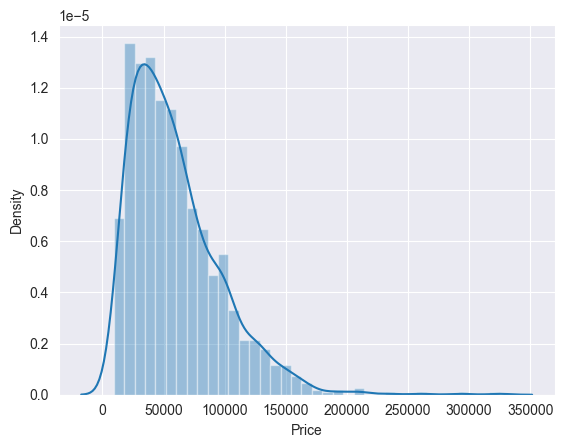

In [9]:
sns.distplot(df['Price'])

In [10]:
# Making function for count plot
font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
                  'verticalalignment':'bottom'}

def countplot(column, xlabel, ylabel, title):
    plt.figure(figsize = (18,7))
    plot = sns.countplot(x= column, data = df)
    plt.setp(plot.get_xticklabels(), rotation=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel, **font)
    plt.title(title, **font)
    plt.show()

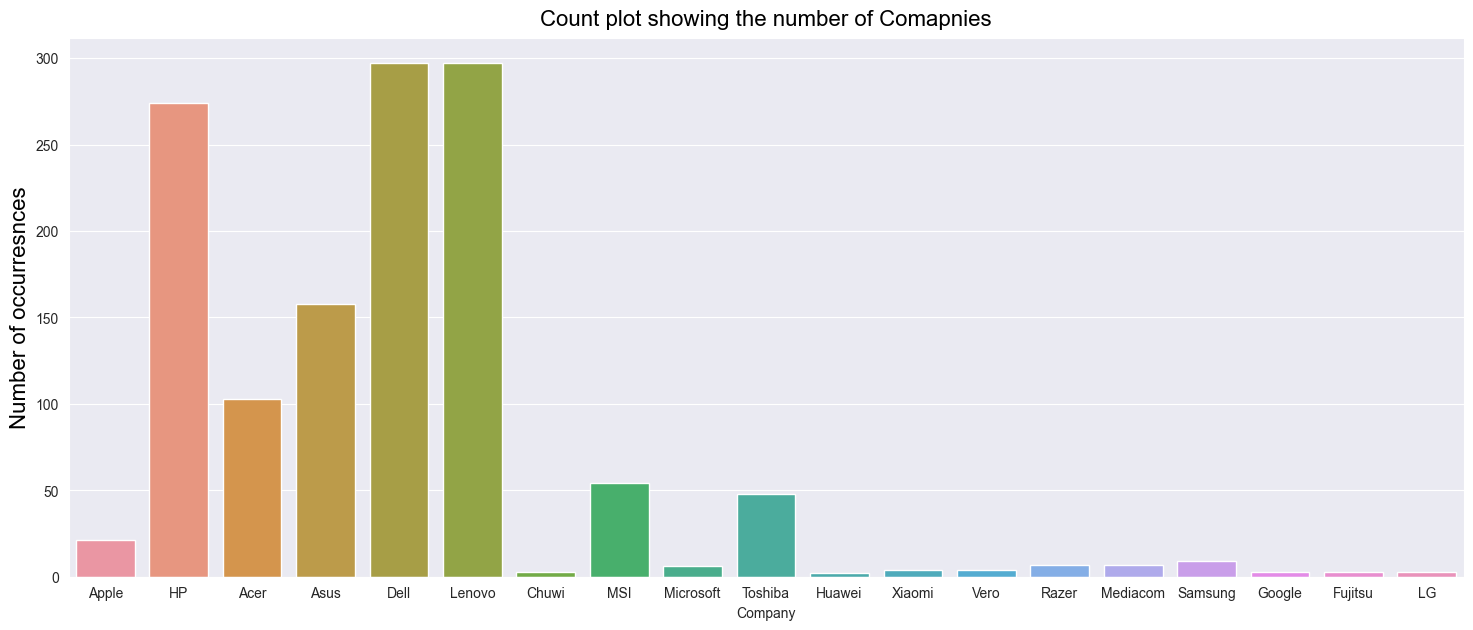

In [11]:
countplot('Company', 'Company', 'Number of occurresnces', 'Count plot showing the number of Comapnies')

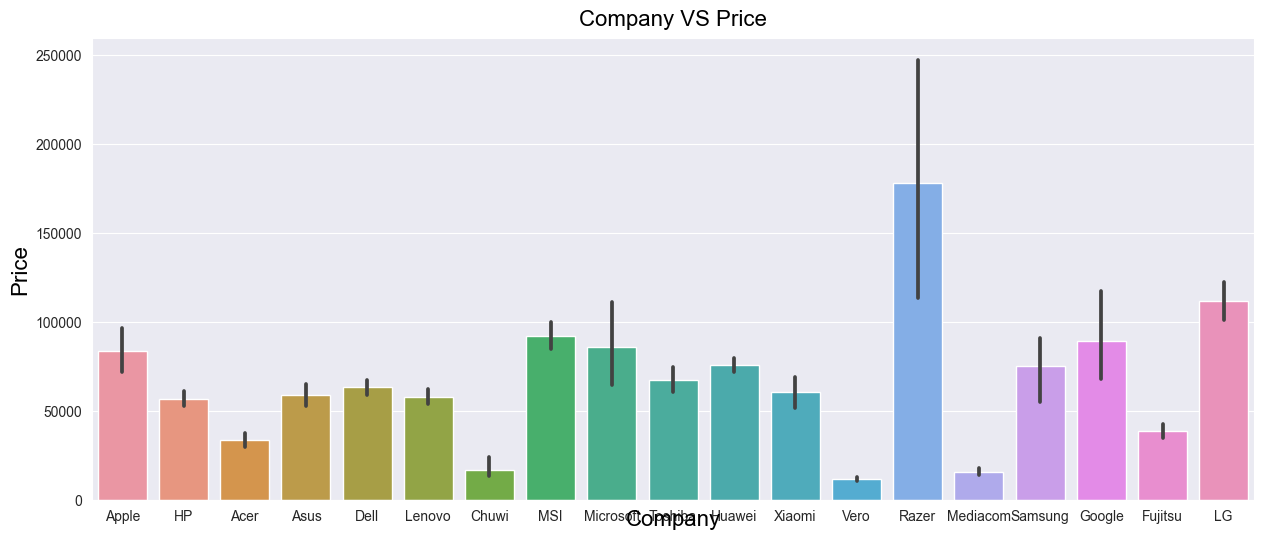

In [12]:
# Plot the barplot of laptop company according to their price
plt.figure(figsize = (15,6))
plot = sns.barplot(x = df['Company'], y= df['Price'])
plt.xticks(rotation = 'vertical')
plt.setp(plot.get_xticklabels(), rotation=0)
plt.xlabel('Company',  **font)
plt.ylabel('Price', **font)
plt.title('Company VS Price', **font)
plt.show()
plt.show()

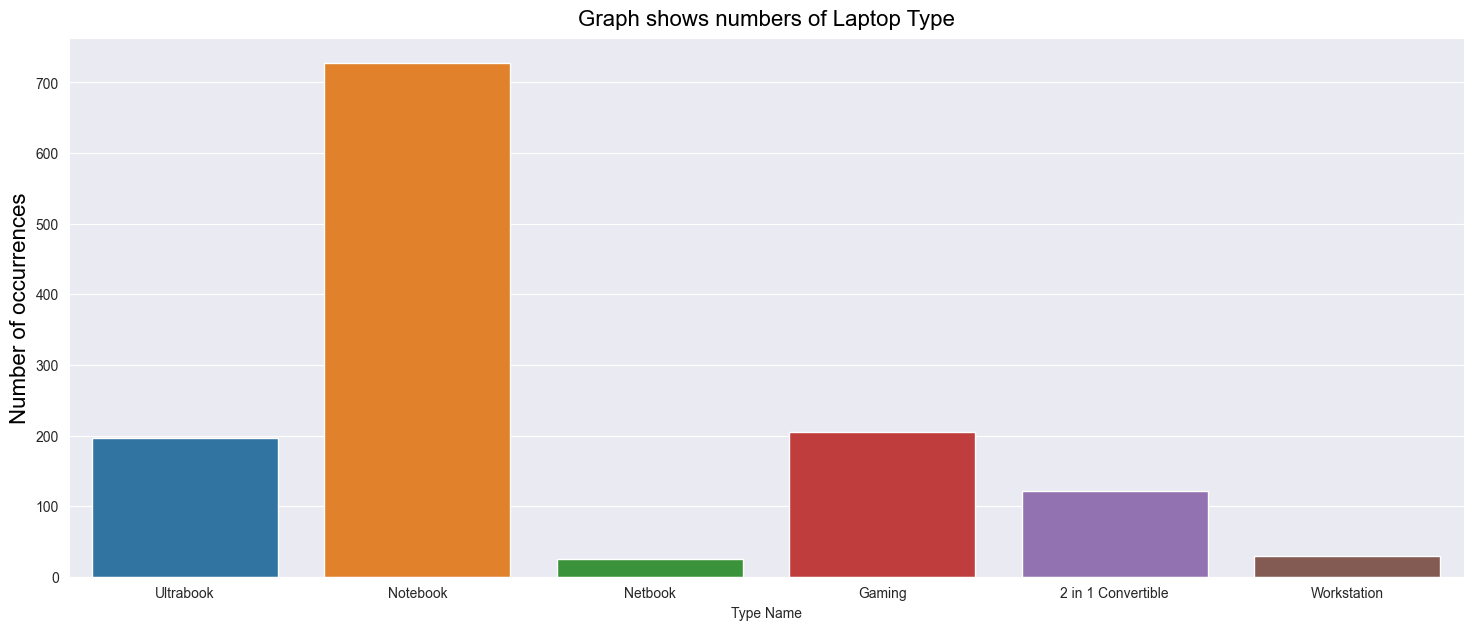

In [13]:
# Plot the barplot of type of laptop according the their count
countplot('TypeName', 'Type Name', 'Number of occurrences', 'Graph shows numbers of Laptop Type')

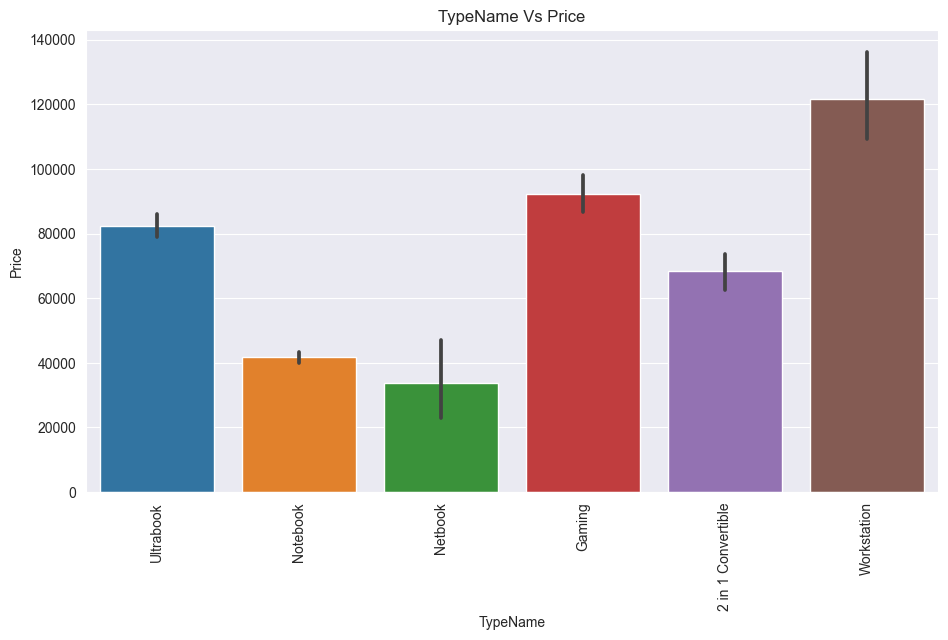

In [14]:
# Plot the barplot of laptop type according to their price
plt.figure(figsize = (11,6))
sns.barplot(x = df['TypeName'], y= df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('TypeName Vs Price')
plt.show()

C:\Users\kumar\AppData\Local\Temp\ipykernel_11284\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

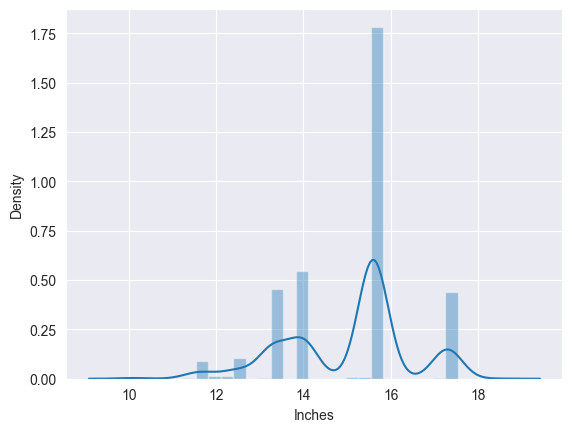

In [15]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

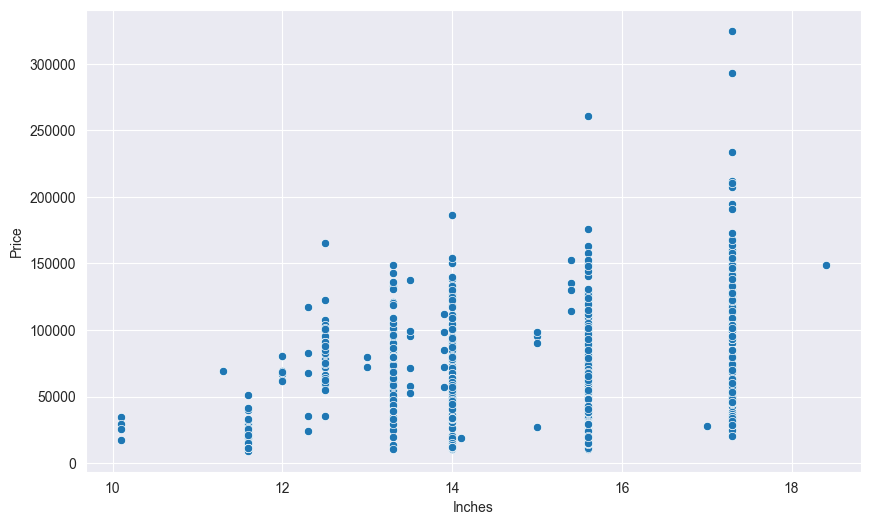

In [16]:
# Plot the Scatterplot of size of display and price
plt.figure(figsize = (10,6))
sns.scatterplot(x = df['Inches'], y = df['Price'])

In [17]:
# Count the no. of laptops according to their screen resolution
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         280
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [18]:
# Add a new column "Touchscreen"
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if isinstance(x, str) and 'Touchscreen' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1103,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,AMD FirePro W6150M,Windows 7,3.00,154458.72,0
403,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Linux,2.50,46833.12,0
482,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,128GB SSD,Intel UHD Graphics 620,Windows 10,1.49,38681.28,0
315,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.33,44968.32,0
124,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon R5,Windows 10,2.10,24029.28,0


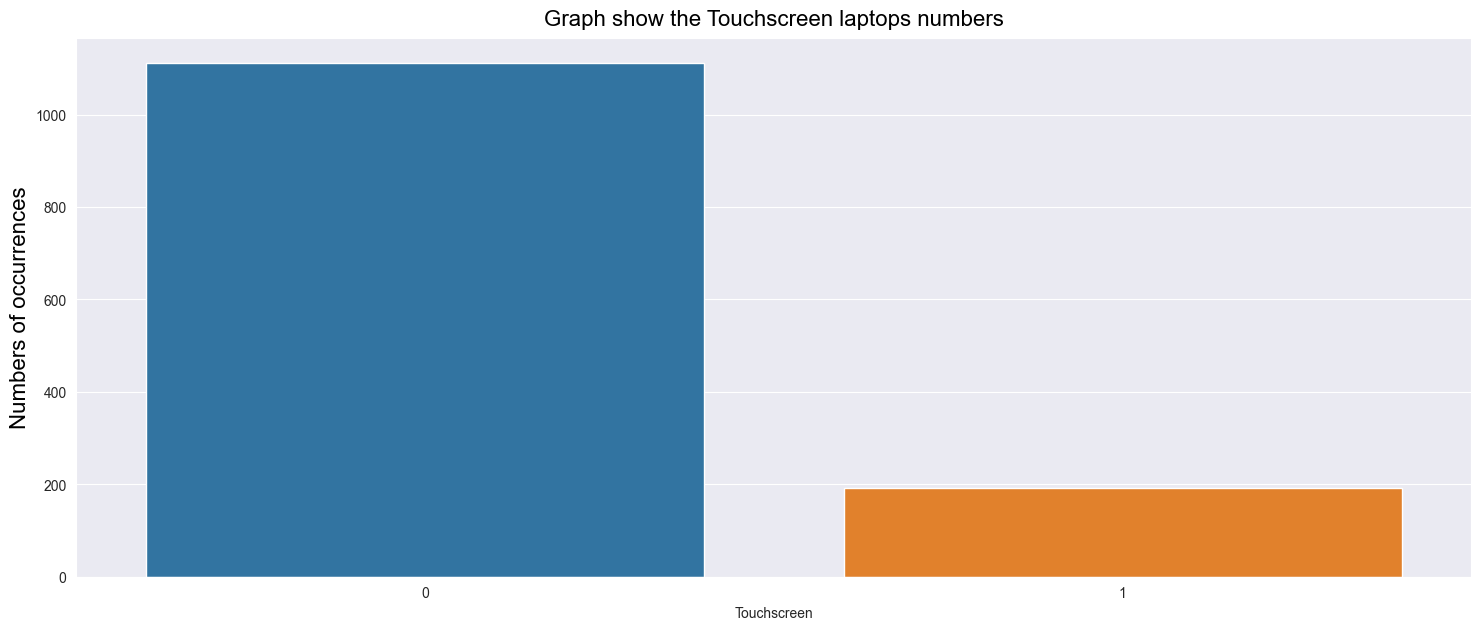

In [19]:
# Plot the barplot of laptop having touchscreen
countplot('Touchscreen','Touchscreen', 'Numbers of occurrences', 'Graph show the Touchscreen laptops numbers')

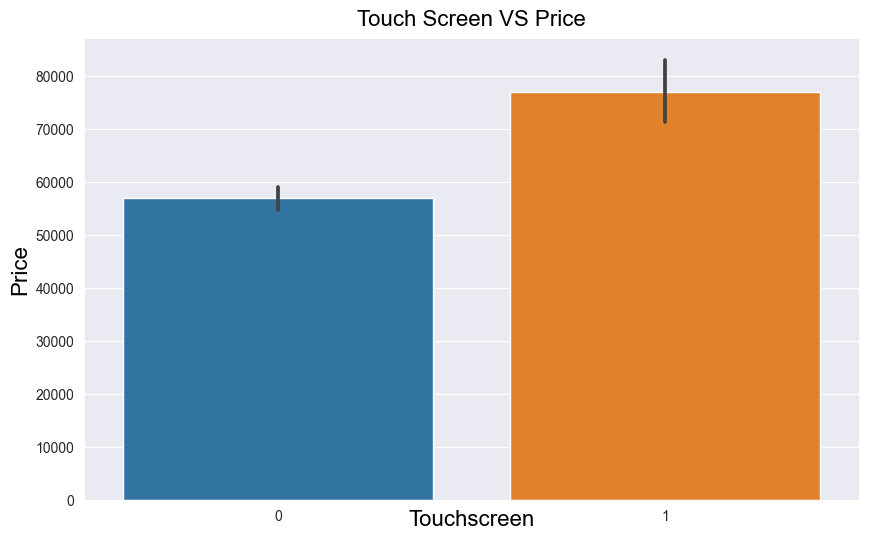

In [20]:
# Plot the barplot of touchscreen/non-touchscreen laptop and their prices
plt.figure(figsize = (10,6))
sns.barplot(x = df['Touchscreen'], y = df['Price'])
plt.title('Touch Screen VS Price', ** font)
plt.xlabel('Touchscreen', **font)
plt.ylabel('Price', **font)
plt.show()

In [21]:
# Add new column 'Ips' extracting from ScreenResolution column
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if isinstance(x, str) and 'IPS' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
1175,Asus,Notebook,14.0,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,40972.32,0,0
882,Asus,Notebook,14.1,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.65,18541.44,0,0
749,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16,256GB SSD,Nvidia Quadro M2000M,Windows 7,3.00,233845.92,0,1
1077,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.78,133146.72,0,0
113,HP,Notebook,14.0,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,4,500GB HDD,Intel UHD Graphics 620,Windows 10,1.63,38468.16,0,1


<Axes: xlabel='Ips'>

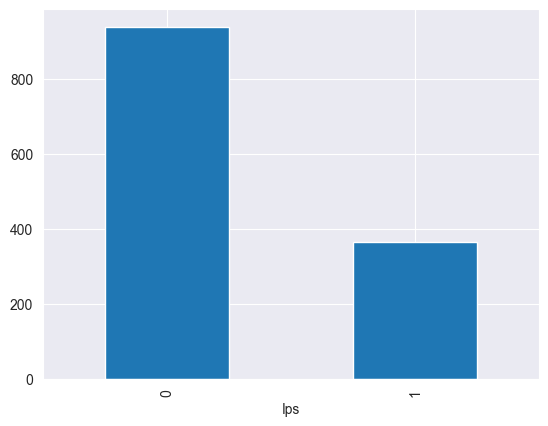

In [22]:
# Plot the barplot of no. of Ips type laptop.
df['Ips'].value_counts().plot(kind='bar')

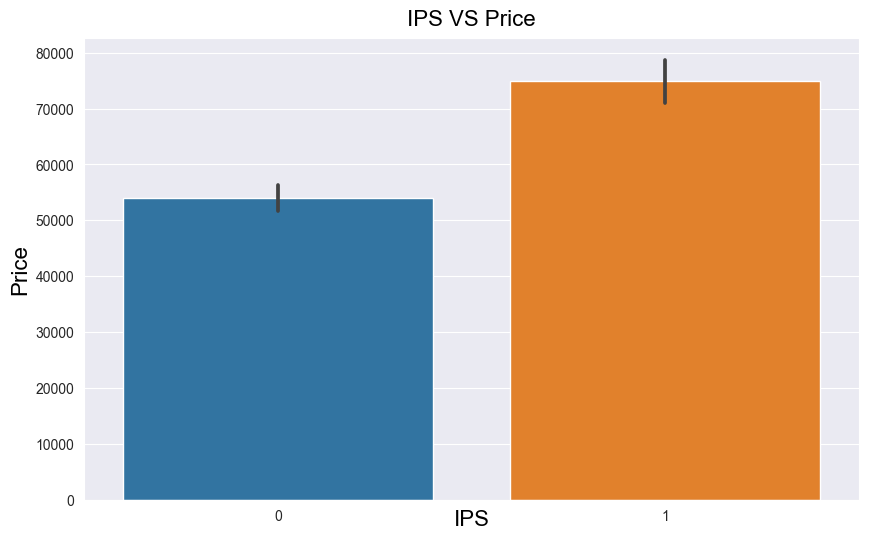

In [23]:
# Plot the barplot of Ips type laptop and their prices
plt.figure(figsize = (10,6))
sns.barplot(x = df['Ips'], y = df['Price'])
plt.title('IPS VS Price', ** font)
plt.xlabel('IPS', **font)
plt.ylabel('Price', **font)
plt.show()


**df['ScreenResolution'].str.split('x', n=1, expand=True):** This line splits the 'ScreenResolution' column into two new columns using the 'x' character as the delimiter. The expand=True argument tells Pandas to create two separate columns. The n=1 argument means that the split will only be performed once, which is useful in case there are multiple 'x' characters in the original string.

**df['X_res'] = new[0] and df['Y_res'] = new[1]:** These two lines assign the first part of the split (before 'x') to a new column 'X_res' and the second part (after 'x') to another new column 'Y_res'.

In [24]:
#fetching x resolution & y resolution from the screen resolution column
res = df['ScreenResolution'].str.split('x', n =1, expand = True)
df['X_res'] = res[0]
df['Y_res'] = res[1]
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


**df['X_res'].str.replace(',',''):** This line replaces any commas (',') in the 'X_res' column with an empty string (''). This is done to remove any commas from numerical values, which is a common preprocessing step when dealing with numeric data.

**df['X_res'].str.findall(r'(\d+\.?\d+)'):** This line uses a regular expression (\d+\.?\d+) to find all numeric values (with or without decimal points) in the 'X_res' column. This step extracts the numeric values from the column.

**.apply(lambda x: x[0]):** This line applies a lambda function to each element in the 'X_res' column, which extracts the first (and only) value from the list of numeric values obtained in step 2. This is done because the findall method returns a list of matched values, and we're assuming there's only one numeric value in each cell.

In [25]:
df['X_res'] = df['X_res'].astype(str).str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0] if len(x) > 0 else None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1302 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1302 non-null   object 
 14  Y_res             1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [27]:
# Change the data types of 'X_res' and 'Y_res'
# Replace None values with 0 (or any other appropriate default value)
df['X_res'] = df['X_res'].fillna(0).astype('int')
df['Y_res'] = df['Y_res'].fillna(0).astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1302 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [28]:
# Add a new column "ppi"
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [29]:
# drop "X_res", "Y_res", "Inches","ScreenResolution" columns 
df.drop(columns = ['X_res', 'Y_res', 'Inches', 'ScreenResolution'], inplace = True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [30]:
# calculate the no of laptop according their cpu
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [31]:
# Add "Cpu Name" column
df['CpuName'] = df['Cpu'].apply(lambda x :" " .join(x.split()[:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CpuName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [32]:
#designed to categorize processor names into specific categories, such as Intel Core i7, 
#Intel Core i5, Intel Core i3, Other Intel Processor, or AMD Processor.

def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [33]:
'''This code snippet correctly applies the fetch_processor function to the 'Cpu Name' column 
   in your DataFrame df and assigns the results to a new column 'Cpu brand.' '''

df['Cpu brand'] = df['CpuName'].apply(fetch_processor)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CpuName,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

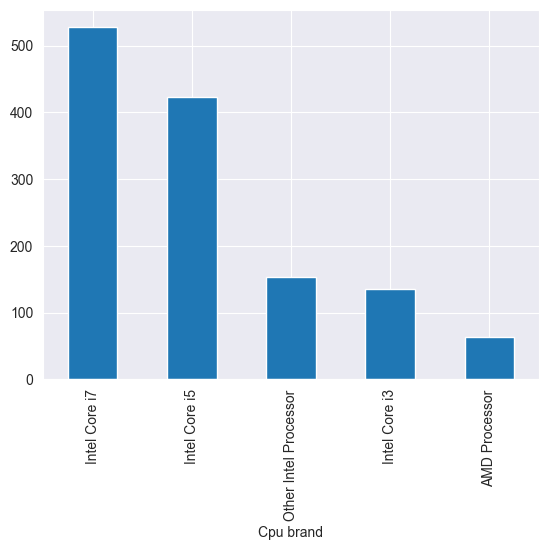

In [34]:
# plot the barplot of Cpu brands according to their count
df['Cpu brand'].value_counts().plot(kind='bar')

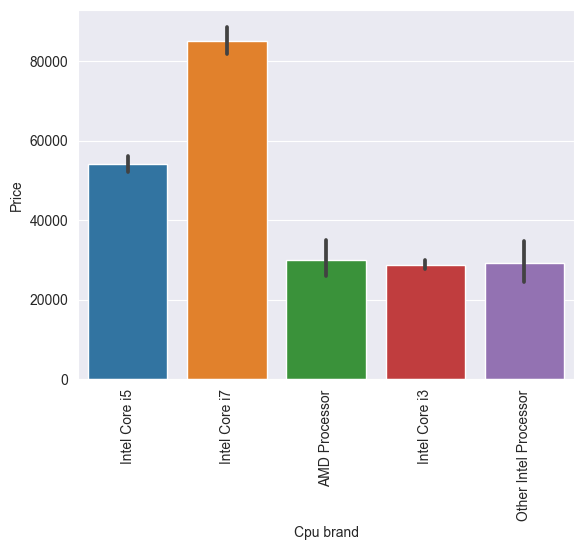

In [35]:
# Plot a barplot of Cpu brand and price of those cpu brand's laptop
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [36]:
# drop columns (cpu, cpu name)
df.drop(columns=['Cpu','CpuName'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


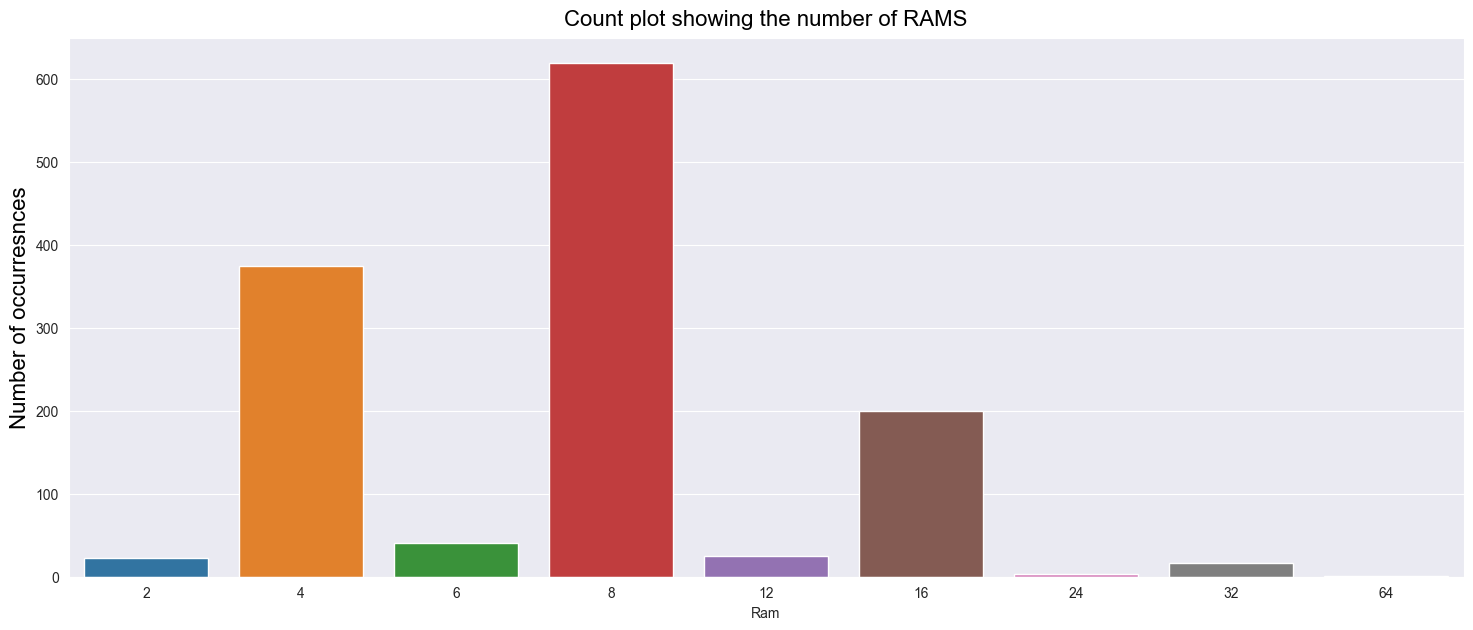

In [37]:
# plot a barplot of total no. of laptop according to their Ram
countplot('Ram', 'Ram', 'Number of occurresnces', 'Count plot showing the number of RAMS')

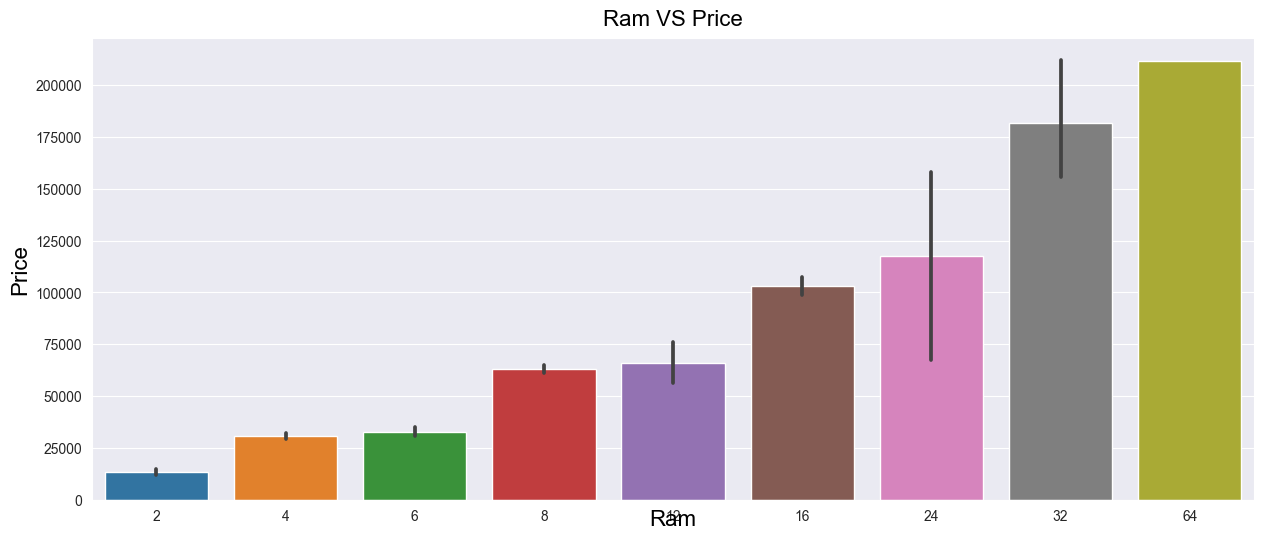

In [38]:
# Plot a barplot of price of laptops according to their Ram
plt.figure(figsize = (15,6))
sns.barplot(x = 'Ram', y = 'Price', data = df)
plt.xlabel('Ram',  **font)
plt.ylabel('Price', **font)
plt.title('Ram VS Price', **font)
plt.show()

In [39]:
# In memory column it have many different disk sapce categories fetching only hdd and ssd form memory column and storing it in a new column.
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [40]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex = True)

#Replacing GB to ''(null or empty)
df['Memory'] = df['Memory'].str.replace('GB', '')

#Replacing TB to 000 (1TB = 1000GB)
df['Memory'] = df['Memory'].str.replace('TB', '000')

new = df['Memory'].str.split('+', n=1, expand =True)

new.value_counts()

0                  1            
128 SSD              1000 HDD       94
256 SSD              1000 HDD       73
512 SSD              1000 HDD       14
256 SSD              2000 HDD       10
512 SSD              2000 HDD        3
1000 SSD             1000 HDD        2
128 SSD              2000 HDD        2
256 SSD              256 SSD         2
                     500 HDD         2
1000 HDD             1000 HDD        1
256 SSD              1000 Hybrid     1
512 SSD              1000 Hybrid     1
                     256 SSD         1
                     512 SSD         1
64 Flash Storage     1000 HDD        1
Name: count, dtype: int64

In [41]:
df['first'] = new[0]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [42]:
df["first"]=df["first"].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [43]:
df['second'] = new[1]
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second
861,HP,Notebook,8,256 SSD,AMD Radeon R7 M465,Windows 10,1.84,71874.720,0,0,141.211998,Intel Core i5,256 SSD,None
984,Toshiba,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,1.75,48751.200,0,0,111.935204,Intel Core i5,500 HDD,None
1055,HP,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,2.31,37570.392,0,0,100.454670,Intel Core i3,500 HDD,None
891,HP,2 in 1 Convertible,16,256 SSD,Intel HD Graphics 620,Windows 10,1.42,74538.720,1,0,276.053530,Intel Core i7,256 SSD,None
1286,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.120,0,0,111.935204,Other Intel Processor,64 Flash Storage,None


In [44]:
df['first'].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '64 Flash Storage', '32 SSD', '2000 HDD', '64 SSD', '1000 Hybrid',
       '1000 SSD', '16 SSD', '16 Flash Storage', '180 SSD', '32 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid'],
      dtype=object)

In [45]:
df['Layer1hdd'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1ssd'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second,Layer1hdd,Layer1ssd
550,Lenovo,Notebook,4,128 SSD,Intel HD Graphics 520,Windows 10,2.20,26586.720,0,0,141.211998,Intel Core i3,128 SSD,None,0,1
984,Toshiba,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,1.75,48751.200,0,0,111.935204,Intel Core i5,500 HDD,None,1,0
736,HP,Workstation,16,256 SSD,Nvidia Quadro M2200,Windows 10,2.60,128884.320,0,0,141.211998,Intel Core i7,256 SSD,None,0,1
270,Apple,Ultrabook,8,512 SSD,Intel Iris Graphics 550,macOS,1.37,104370.192,0,1,226.983005,Intel Core i5,512 SSD,None,0,1
918,Dell,Gaming,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.60,71874.720,0,0,141.211998,Intel Core i7,128 SSD,1000 HDD,0,1


In [46]:
df['first'] = df['first'].str.replace(r'\D', '')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second,Layer1hdd,Layer1ssd
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None,0,1
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None,0,1
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None,0,1
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None,0,1


In [47]:
df["second"].fillna("0", inplace = True)
df["Layer2hdd"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2ssd"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df['second'] = df['second'].str.replace(r'\D', '')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second,Layer1hdd,Layer1ssd,Layer2hdd,Layer2ssd
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,0,1,0,0


In [48]:
# Replace non-numeric characters with an empty string
df['first'] = df['first'].str.replace(r'\D', '', regex=True)
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Convert to integers (handle empty strings)
df['first'] = df['first'].apply(lambda x: int(x) if x else 0)
df['second'] = df['second'].apply(lambda x: int(x) if x else 0)


In [49]:
df["HDD"]=(df["first"]*df["Layer1hdd"]+df["second"]*df["Layer2hdd"])
df["SSD"]=(df["first"]*df["Layer1ssd"]+df["second"]*df["Layer2ssd"])
df.drop(columns=['first', 'second', 'Layer1hdd', 'Layer1ssd',
                 'Layer2hdd', 'Layer2ssd'],inplace=True)
df.drop(columns = 'Memory', inplace = True)
df.head()


,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Gpu          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float32
 6   Price        1303 non-null   float64
 7   Touchscreen  1303 non-null   int64  
 8   Ips          1303 non-null   int64  
 9   ppi          1303 non-null   float64
 10  Cpu brand    1303 non-null   object 
 11  HDD          1303 non-null   int64  
 12  SSD          1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 122.3+ KB


In [51]:
# calculate the total no of laptops according to 'Gpu'
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [52]:
# Create a new column "Gpu brand" through splitting the Gpu column
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [53]:
#calculate the total no of laptops according to their Gpu brand
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

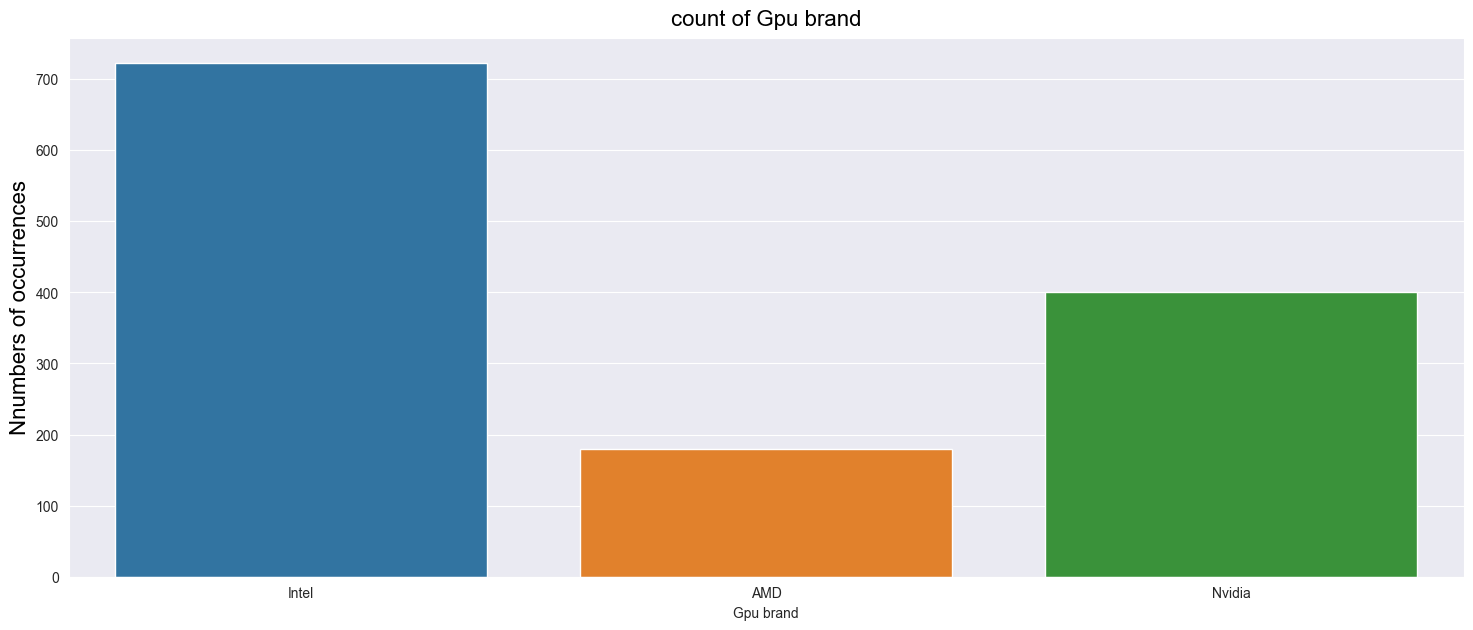

In [54]:
# drop ARM Gpu brand
df = df[df['Gpu brand'] != 'ARM']
countplot('Gpu brand', 'Gpu brand', 'Nnumbers of occurrences', 'count of Gpu brand')

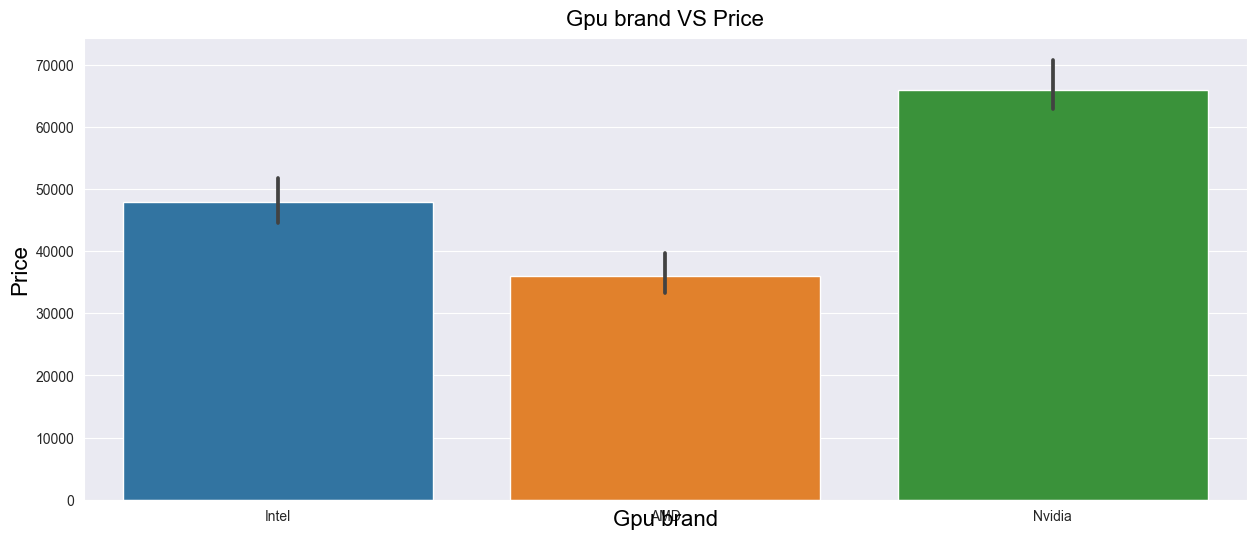

In [55]:
# Plot a barplot of laptop's price according to their Gpu Brand
plt.figure(figsize = (15,6))
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xlabel('Gpu brand',  **font)
plt.ylabel('Price', **font)
plt.title('Gpu brand VS Price', **font)
plt.show()

In [56]:
#drop Gpu column
df.drop(columns=['Gpu'],inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [57]:
# calculate the total no of laptops according to their operating system
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [58]:
def cat_os(os):
    if os == 'Windows 10' or os == 'Windows 7' or os == 'Windows 10 S':
        return 'Windows'
    elif os == 'Mac OS X' or os == 'macOS':
        return 'Mac'
    else:
        return 'others/NO OS/Linux'

In [59]:
df['OS'] = df['OpSys'].apply(cat_os)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,others/NO OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [60]:
df.drop(columns = 'OpSys', inplace = True)
df.sample(3)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
155,HP,Notebook,6,1.91,32980.32,0,0,141.211998,Intel Core i5,0,256,AMD,Windows
187,Lenovo,Gaming,8,2.40,41505.12,0,1,141.211998,Intel Core i5,0,256,Nvidia,others/NO OS/Linux
252,Asus,Notebook,4,1.68,24988.32,0,0,100.454670,AMD Processor,1000,0,AMD,Windows


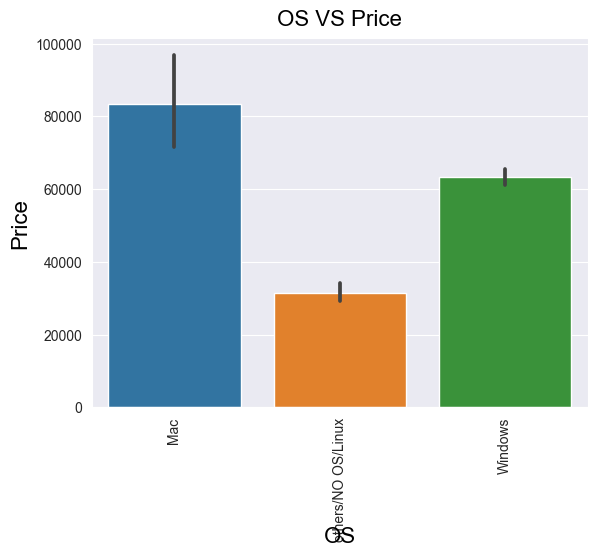

In [61]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.xlabel('OS',  **font)
plt.ylabel('Price', **font)
plt.title('OS VS Price', **font)
plt.show()

C:\Users\kumar\AppData\Local\Temp\ipykernel_11284\620503176.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

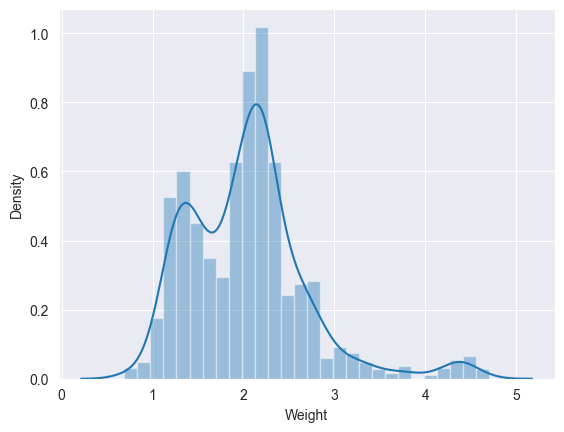

In [62]:
#plot displot of weight and density
sns.distplot(df['Weight'])

Text(0.5, 1.0, 'Weight VS Price')

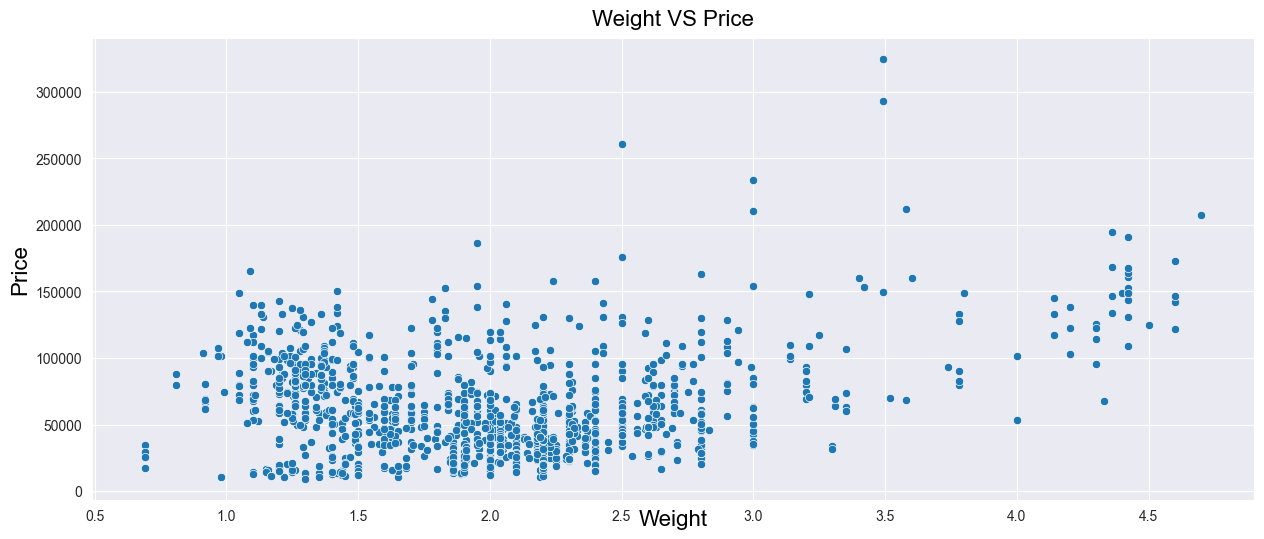

In [63]:
# Plot a scatterplot of laptop weight anf Price
plt.figure(figsize = (15,6))
sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.xlabel('Weight',  **font)
plt.ylabel('Price', **font)
plt.title('Weight VS Price', **font)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   Ips          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu brand    1302 non-null   object 
 12  OS           1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


In [65]:
# Convert only specific columns to numeric, ignoring non-numeric values
numeric_columns = ['Ram','Weight','Price','Touchscreen','Ips', 'ppi', 'HDD', 'SSD']
df = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# The 'errors' parameter with 'coerce' will convert non-numeric values to NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ram          1302 non-null   int32  
 1   Weight       1302 non-null   float32
 2   Price        1302 non-null   float64
 3   Touchscreen  1302 non-null   int64  
 4   Ips          1302 non-null   int64  
 5   ppi          1302 non-null   float64
 6   HDD          1302 non-null   int64  
 7   SSD          1302 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4)
memory usage: 81.4 KB


In [66]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475323
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

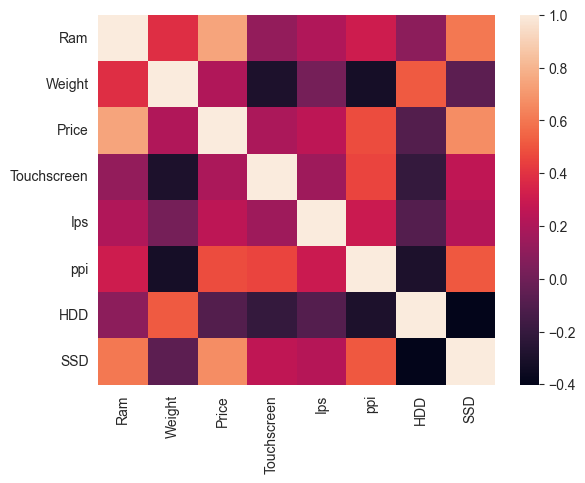

In [67]:
# Plot a heatmap of all the numeric columns
sns.heatmap(df.corr())

C:\Users\kumar\AppData\Local\Temp\ipykernel_11284\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

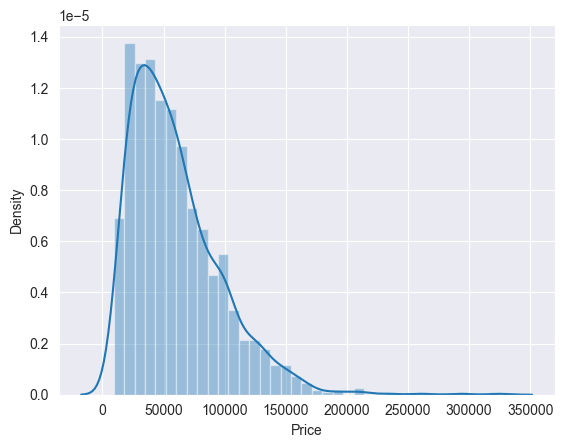

In [68]:
sns.distplot(df['Price'])

C:\Users\kumar\AppData\Local\Temp\ipykernel_11284\1335209318.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

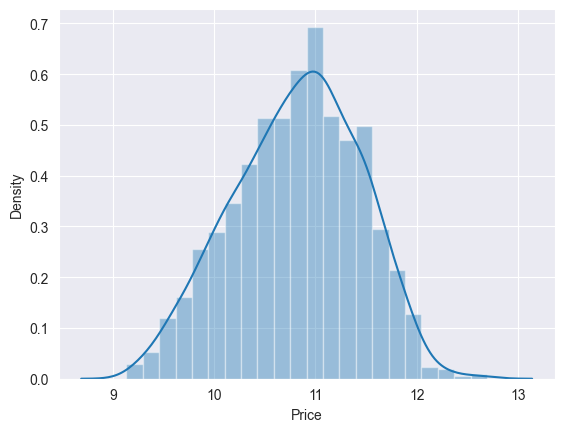

In [69]:
# Normalizing the price using log 
sns.distplot(np.log(df['Price']))

In [70]:
# seperate the features data and target data
X = df.drop(columns=['Price'])
Y = np.log(df['Price'])

In [71]:
X

,Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD
0,8,1.37,0,1,226.983005,0,128
1,8,1.34,0,0,127.677940,0,0
2,8,1.86,0,0,141.211998,0,256
3,16,1.83,0,1,220.534624,0,512
4,8,1.37,0,1,226.983005,0,256
...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.350512,0,128
1299,16,1.30,1,1,276.053530,0,512
1300,2,1.50,0,0,111.935204,0,0
1301,6,2.19,0,0,100.454670,1000,0


In [72]:
Y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

#### Train-test split

In [73]:
# Split the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=2)

#### import all algorithms which is going to be used

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Random Forest Regressor
A Random Forest Regressor is a machine learning algorithm used for regression tasks. It combines the power of multiple decision trees to make accurate predictions. It works by training a collection of decision trees on different subsets of the training data and then averaging their predictions to reduce overfitting. Each tree independently predicts the target variable, and the final prediction is an ensemble of these individual tree predictions. This ensemble approach improves prediction accuracy, handles complex relationships in the data, and is robust to outliers and noise. Random Forest Regressor is a popular choice for solving regression problems in various domains.

MAE: 0.21151463059880438
MSE: 0.07983307892865041
RMSE: 0.28254748083932796
R^2 Score: 0.7700241277313065


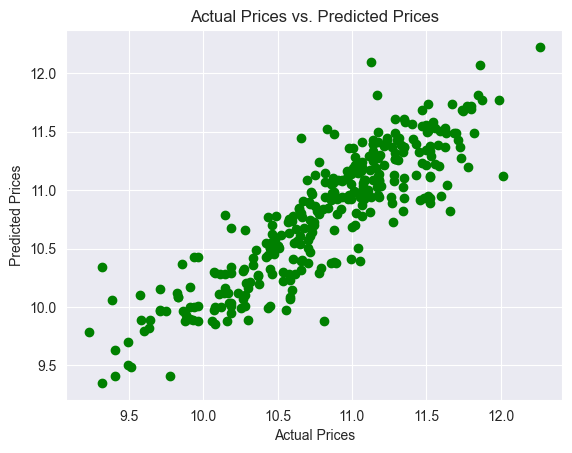

In [75]:
# Choose and train a model (Random Forest Regressor in this example)
model = RandomForestRegressor(n_estimators=100, random_state=4)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')

# Visualize predictions vs. actual prices (for example, using a scatterplot)
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

### I used Random forest for model and got accuracy of 77

## K Neighbors Regressor
K Neighbors Regressor is a supervised machine learning algorithm used for regression tasks. It predicts a continuous target variable by considering the k nearest data points in the training dataset. It measures proximity using a distance metric, typically Euclidean distance. To make a prediction for a new data point, the algorithm calculates the average of the target values of its k nearest neighbors. A smaller k value results in a more flexible model, while a larger k value leads to a smoother, less sensitive prediction. K Neighbors Regressor is simple to implement but sensitive to noise, requiring careful selection of k for optimal performance.

MAE: 0.26049880181829305
MSE: 0.11835810028654943
RMSE: 0.3440321210098694
R^2 Score: 0.6590447503873459


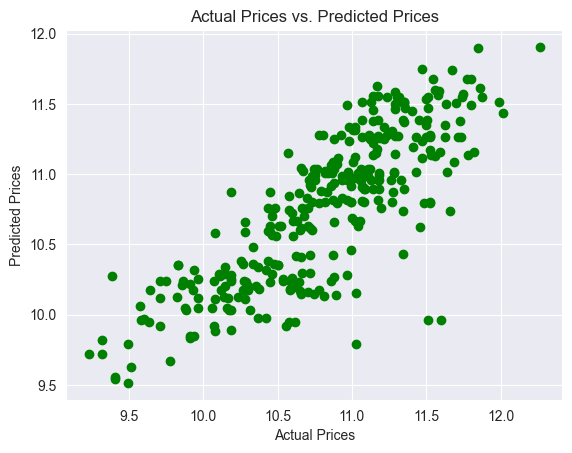

In [76]:
# Choose and train a model (K Neighbors Regressor in this example)
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')

# Visualize predictions vs. actual prices (for example, using a scatterplot)
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

### I used K Neighbors Regressor for model and got accuracy of 65.90

## Decision Tree Regressor
A Decision Tree Regressor is a machine learning algorithm used for regression tasks. It works by recursively partitioning the dataset into subsets based on the values of input features, aiming to minimize the variance of the target variable within each subset. Each partitioning decision is represented as a node in a tree structure, with leaf nodes containing predicted continuous values. During prediction, the algorithm traverses the tree from the root to a leaf node, and the average of target values in that leaf node is used as the prediction. Decision trees are interpretable and can capture complex relationships between features and continuous outcomes.

MAE: 0.24871742161210728
MSE: 0.11779356356053045
RMSE: 0.3432106693570735
R^2 Score: 0.6606710164381637


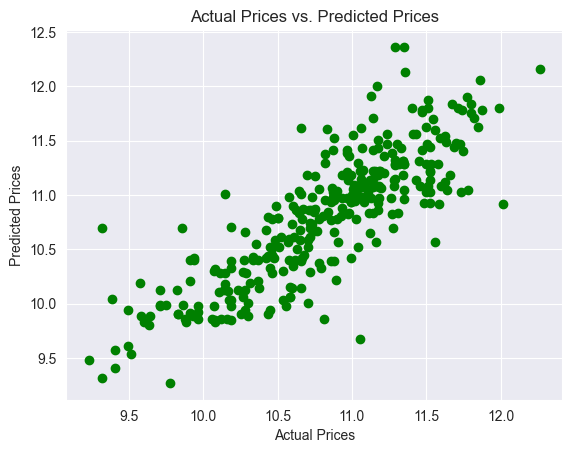

In [77]:
# Choose and train a model (Decision Tree Regressor in this example)
model = DecisionTreeRegressor( random_state=9)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')

# Visualize predictions vs. actual prices (for example, using a scatterplot)
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

### I used Decision Tree Regressor for model and got accuracy of 66.06

## Linear Regresssion
Linear regression is a statistical method used to model the relationship between a dependent variable (often denoted as "Y") and one or more independent variables (often denoted as "X"). It assumes a linear relationship, where changes in the independent variables lead to proportional changes in the dependent variable. The goal is to find the best-fitting linear equation that minimizes the difference between predicted and actual values. This equation takes the form Y = aX + b, with "a" representing the slope (how much Y changes for a unit change in X) and "b" as the intercept (the value of Y when X is zero). Linear regression is commonly used for prediction and understanding relationships between variables in fields like economics and science.

MAE: 0.30876329803311664
MSE: 0.16325139636744782
RMSE: 0.40404380501060505
R^2 Score: 0.5297202264710308


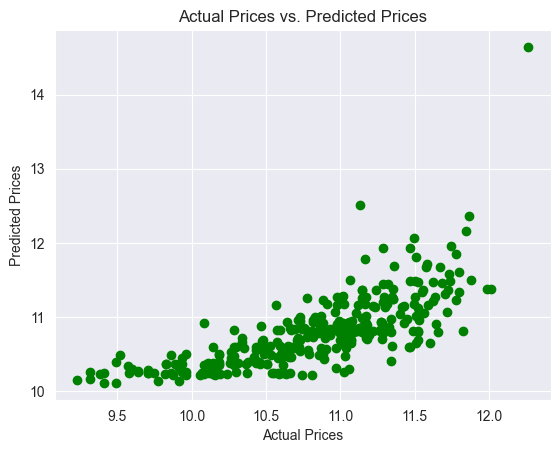

In [78]:
# Choose and train a model (Linear Regression in this example)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')

# Visualize predictions vs. actual prices (for example, using a scatterplot)
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

### I used Linear Regression for model and got accuracy of 52.97.

In [79]:
# Define the features of the new laptop
new_laptop_features = {
    'Ram': 16,
    'Weight': 1.50,
    'Touchscreen': 1,
    'Ips': 1,
    'ppi': 200,
    'HDD': 1000,
    'SSD': 512
    # Add other features as needed
}

# Create a DataFrame with the new laptop's features
new_laptop_df = pd.DataFrame([new_laptop_features])

# Perform any necessary preprocessing on the new laptop's data
# You should apply the same preprocessing steps you used for your training data

# Use the trained model to predict the price of the new laptop
predicted_price = model.predict(new_laptop_df)

# Apply the exponential function to the predicted price
predicted_price_exp = np.exp(predicted_price)

print(f'Predicted Price: Rs.{predicted_price_exp[0]:.2f}')


Predicted Price: Rs.120414.04


## If you compare all four algorithms then you found that the 
## Random forest is best algorithm for this model.